<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Libraries</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Processing</a></span></li></ul></div>

**Goal**: <br>
Use a Naive Bayes algorithm to classify SMS messages as spam or not spam.

Spam messages frequently contain words like:
- free
- win
- winner
- cash
- prize

And they also are more likely to use capital letters or excalamation marks

The Naive Bayes theorem uses conditional probability to infer new probabilities from known probabilities.
We can calculate the probability of some event occuring, based on the probabilities of various other features that are assumed to be independent of each other.

## Libraries

In [54]:
# data
import pandas as pd
import numpy as np
import os

# processing
import string

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data
Text messages from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

In [9]:
# import the data
df = pd.read_table(os.path.join('data', 'smsspamcollection', 'SMSSpamCollection'),
             names=['label', 'sms_message'])

df

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# check out the relative sizes of ham and spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

As expected, spam messages are far less common

In [13]:
# check out the word frequencies based on label

def count_words(text):
    """Count how many times each unique word occurs in text."""
    counts = dict()  # dictionary of { <word>: <count> } pairs to return
    
    # Convert to lowercase
    text = text.lower()
    
    # Split text into tokens (words), leaving out punctuation

    # strip punctuation
    new_text = ''
    for letter in text:
        if letter not in string.punctuation:
            new_text = new_text + letter
    text = new_text

    # split into a list
    text = text.split()
    
    # Aggregate word counts using a dictionary
    for word in text:
        if word in counts.keys():
            counts.update({word:counts[word]+1})
        else:
            counts.update({word:1})
    
    return counts

In [24]:
# get all spam text
spam_filter = df['label'] == 'spam'
spam_text = ''.join([text for text in df['sms_message'][spam_filter]])

# spam word_counts
spam_word_counts = count_words(spam_text)
spam_word_counts

{'free': 181,
 'entry': 26,
 'in': 72,
 '2': 172,
 'a': 375,
 'wkly': 14,
 'comp': 10,
 'to': 688,
 'win': 51,
 'fa': 4,
 'cup': 5,
 'final': 14,
 'tkts': 4,
 '21st': 2,
 'may': 7,
 '2005': 2,
 'text': 115,
 '87121': 4,
 'receive': 33,
 'questionstd': 2,
 'txt': 149,
 'ratetcs': 2,
 'apply': 19,
 '08452810075over18sfreemsg': 1,
 'hey': 3,
 'there': 11,
 'darling': 2,
 'its': 11,
 'been': 43,
 '3': 19,
 'weeks': 13,
 'now': 174,
 'and': 122,
 'no': 56,
 'word': 22,
 'back': 22,
 'id': 2,
 'like': 13,
 'some': 6,
 'fun': 9,
 'you': 226,
 'up': 21,
 'for': 194,
 'it': 26,
 'still': 7,
 'tb': 1,
 'ok': 5,
 'xxx': 7,
 'std': 9,
 'chgs': 1,
 'send': 65,
 '£150': 22,
 'rcvwinner': 1,
 'as': 28,
 'valued': 11,
 'network': 24,
 'customer': 43,
 'have': 135,
 'selected': 25,
 'receivea': 2,
 '£900': 7,
 'prize': 86,
 'reward': 10,
 'claim': 112,
 'call': 335,
 '09061701461': 2,
 'code': 29,
 'kl341': 2,
 'valid': 23,
 '12': 10,
 'hours': 5,
 'onlyhad': 1,
 'your': 251,
 'mobile': 121,
 '11': 4,


In [26]:
# get all ham text
ham_text = ''.join([text for text in df['sms_message'][np.logical_not(spam_filter)]])

# ham word counts
ham_word_counts = count_words(ham_text)
ham_word_counts

{'go': 243,
 'until': 21,
 'jurong': 1,
 'point': 10,
 'crazy': 9,
 'available': 12,
 'only': 119,
 'in': 794,
 'bugis': 5,
 'n': 137,
 'great': 84,
 'world': 31,
 'la': 6,
 'e': 75,
 'buffet': 2,
 'cine': 7,
 'there': 143,
 'got': 219,
 'amore': 1,
 'watok': 1,
 'lar': 29,
 'joking': 4,
 'wif': 26,
 'u': 901,
 'oniu': 1,
 'dun': 53,
 'say': 81,
 'so': 372,
 'early': 28,
 'hor': 2,
 'c': 58,
 'already': 65,
 'then': 174,
 'saynah': 1,
 'i': 1818,
 'dont': 238,
 'think': 122,
 'he': 163,
 'goes': 26,
 'to': 1556,
 'usf': 9,
 'lives': 4,
 'around': 50,
 'here': 85,
 'thougheven': 1,
 'my': 708,
 'brother': 17,
 'is': 707,
 'not': 378,
 'like': 220,
 'speak': 20,
 'with': 269,
 'me': 669,
 'they': 98,
 'treat': 13,
 'aids': 1,
 'patentas': 1,
 'per': 13,
 'your': 398,
 'request': 6,
 'melle': 6,
 'oru': 4,
 'minnaminunginte': 3,
 'nurungu': 3,
 'vettam': 3,
 'has': 86,
 'been': 86,
 'set': 17,
 'as': 131,
 'callertune': 5,
 'for': 497,
 'all': 229,
 'callers': 5,
 'press': 7,
 '9': 22,
 '

In [33]:
def bar_plotter(word_count_dict, n=5):
    
    df = pd.DataFrame(data={'Word':list(word_count_dict.keys()), 'Count':list(word_count_dict.values())})
    df.sort_values(by='Count', ascending=False, inplace=True)
    
    df.head(n)
    return df

In [42]:
# put all this data into a dataframe
word_count_df = pd.DataFrame(data={'Label':['spam']*len(spam_word_counts)+['ham']*len(ham_word_counts), 
                                   'Word':list(spam_word_counts.keys())+list(ham_word_counts.keys()), 
                                   'Count':list(spam_word_counts.values())+list(ham_word_counts.values())})

word_count_df

,Label,Word,Count
0,spam,free,181
1,spam,entry,26
2,spam,in,72
3,spam,2,172
4,spam,a,375
...,...,...,...
14391,ham,homepity,1
14392,ham,soany,1
14393,ham,suggestionsthe,1
14394,ham,bitching,1


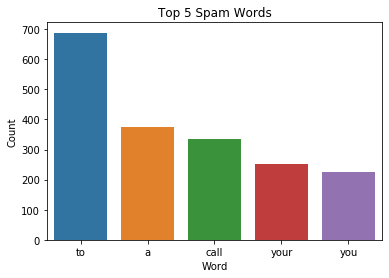

In [58]:
# top n spam words
n = 5
spam_filter = word_count_df['Label'] == 'spam'
plot_df = word_count_df[spam_filter].sort_values(by=['Count'], ascending=False).head(n).copy()

sns.barplot(x='Word', y='Count', data=plot_df)
plt.title('Top '+ str(n) + ' Spam Words')
plt.show()

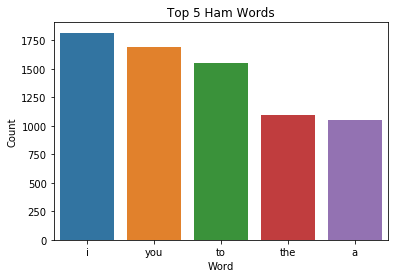

In [59]:
# top n ham words
n = 5
ham_filter = word_count_df['Label'] == 'ham'
plot_df = word_count_df[ham_filter].sort_values(by=['Count'], ascending=False).head(n).copy()

sns.barplot(x='Word', y='Count', data=plot_df)
plt.title('Top '+ str(n) + ' Ham Words')
plt.show()

Clearly, the top $n$ words in both types of text are too common, and will not make good features.

# Data Processing

In [ ]:
# map the labels to numeric values
df['label'] = df['label'].map({'spam':1, 'ham':0})
df